In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

crime_df = pd.read_csv("crime_clean_final.csv")
#house_df = pd.read_csv("house_by_postcode_2022.csv")

#merged_df = pd.merge(crime_df, house_df, on="POST_CODE")
#num_postcodes = len(merged_df["POST_CODE"].unique())

#print("Number of common postcodes in both files:", num_postcodes)


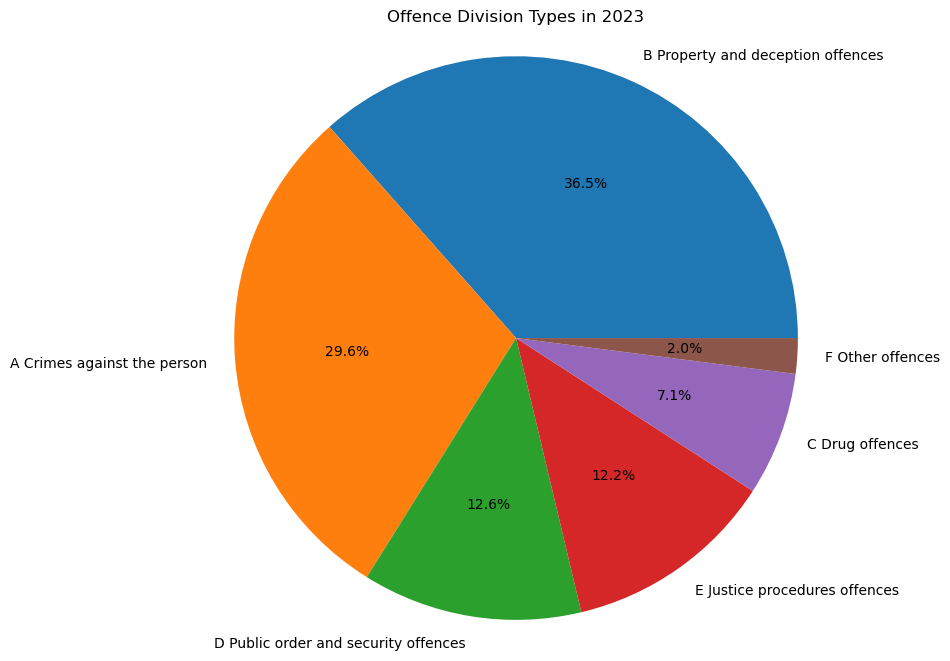

In [33]:
crime_df_2023 = crime_df[crime_df["Year"] == 2023]

offence_division_counts = crime_df_2023["Offence Division"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(offence_division_counts, labels=offence_division_counts.index, autopct='%1.1f%%')
plt.title("Offence Division Types in 2023")
plt.axis('equal')
plt.savefig("fig1_offence_division_types_2023",bbox_inches="tight")
plt.show()


<Figure size 1200x600 with 0 Axes>

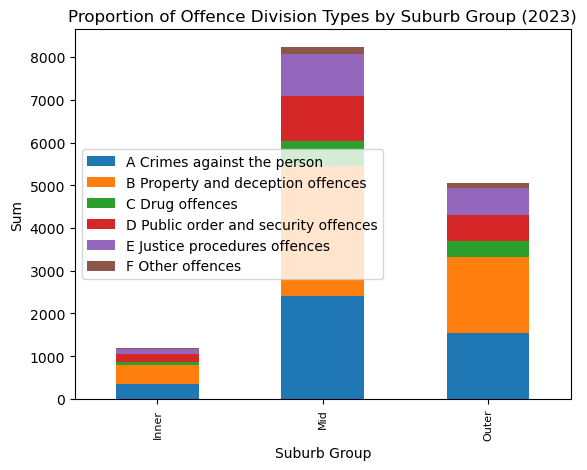

In [18]:
# Filter the DataFrame by the 'Year' column to include only records for 2023
crime_2023_df = Median_Crime_df[Median_Crime_df['Year'] == 2023]
# Group the filtered DataFrame by 'SUBURB_GROUP' and 'Offence Division', and calculate the count
crime_by_division = crime_2023_df.groupby(['SUBURB_GROUP', 'Offence Division']).size().reset_index(name='Incidents Recorded')
# Pivot the DataFrame to make 'Offence Division' columns
crime_by_division = crime_by_division.pivot(index='SUBURB_GROUP', columns='Offence Division', values='Incidents Recorded')
# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width (12) and height (6) as desired
# Plotting the stacked bar chart
crime_by_division.plot(kind='bar', stacked=True)
# Set the title and labels
plt.title('Proportion of Offence Division Types by Suburb Group (2023)')
plt.xlabel('Suburb Group')
plt.ylabel('Sum')
# Show the legend
plt.legend()
# Adjust the x-axis labels size
plt.xticks(fontsize=8)
# Adjust the chart height
plt.ylim([0, 30])  # Adjust the y-axis limits as desired
# Display the chart
plt.show()

In [27]:
# Filter the DataFrame by the 'Year' column to include only records for 2023
crime_2023_df = Median_Crime_df[Median_Crime_df['Year'] == 2023]
# Group the filtered DataFrame by 'SUBURB_GROUP' and 'Offence Division', and calculate the mean of 'Incidents Recorded'
crime_mean_by_group_division = crime_2023_df.groupby(['SUBURB_GROUP', 'Offence Division'])['Incidents Recorded'].mean().reset_index()
# Pivot the DataFrame to make 'Offence Division' columns
crime_mean_by_group_division_pivot = crime_mean_by_group_division.pivot(index='SUBURB_GROUP', columns='Offence Division', values='Incidents Recorded')
# Display the pivoted DataFrame
crime_mean_by_group_division_pivot

Offence Division,A Crimes against the person,B Property and deception offences,C Drug offences,D Public order and security offences,E Justice procedures offences,F Other offences
SUBURB_GROUP,,,,,,
Inner,10.207493,36.732143,12.637681,6.632768,15.386861,1.807692
Mid,7.517686,24.662508,7.252931,4.416747,15.057229,1.318182
Outer,12.208198,26.841783,9.722992,6.362890,23.746411,1.400000


<Figure size 1200x600 with 0 Axes>

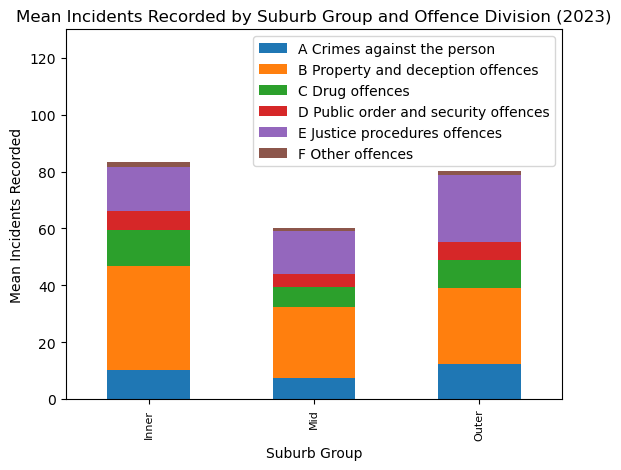

In [36]:
# Filter the DataFrame by the 'Year' column to include only records for 2023
crime_2023_df = Median_Crime_df[Median_Crime_df['Year'] == 2023]
# Group the filtered DataFrame by 'SUBURB_GROUP' and 'Offence Division', and calculate the mean of 'Incidents Recorded'
crime_mean_by_group_division = crime_2023_df.groupby(['SUBURB_GROUP', 'Offence Division'])['Incidents Recorded'].mean().reset_index()
# Pivot the DataFrame to make 'Offence Division' columns
crime_mean_by_group_division_pivot = crime_mean_by_group_division.pivot(index='SUBURB_GROUP', columns='Offence Division', values='Incidents Recorded')
# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width (12) and height (6) as desired
# Plotting the stacked bar chart
crime_mean_by_group_division_pivot.plot(kind='bar', stacked=True)
# Set the title and labels
plt.title('Mean Incidents Recorded by Suburb Group and Offence Division (2023)')
plt.xlabel('Suburb Group')
plt.ylabel('Mean Incidents Recorded')
# Show the legend
plt.legend()
# Adjust the x-axis labels size
plt.xticks(fontsize=8)
plt.ylim([0, 130])  # Adjust the y-axis limits as desired
# Display the chart
plt.show()

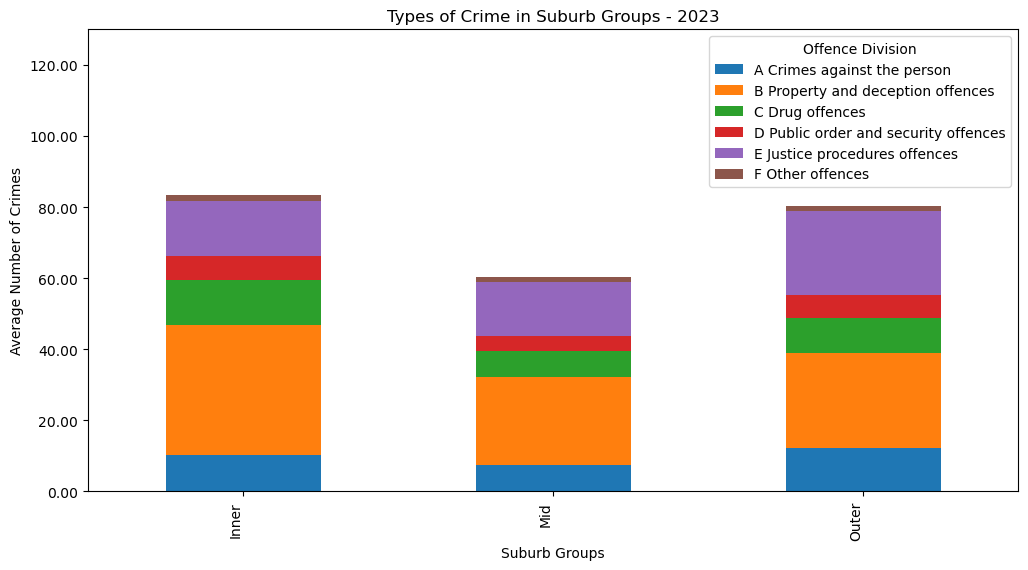

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Load the CSV file into a DataFrame
Median_Crime_df = pd.read_csv("crime_clean_final.csv")

# Filter the data for the year 2023
Median_Crime_2023 = Median_Crime_df[Median_Crime_df["Year"] == 2023]

# Group the data by SUBURB_GROUP and Offence Division and calculate the mean of crimes
grouped_data = Median_Crime_2023.groupby(["SUBURB_GROUP", "Offence Division"])["Incidents Recorded"].mean().unstack()

# Define a custom colormap for Offence Division
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]

# Generate the stacked bar plot
grouped_data.plot(kind="bar", stacked=True, colormap=plt.cm.colors.ListedColormap(colors), figsize=(12, 6))
plt.title("Types of Crime in Suburb Groups - 2023")
plt.xlabel("Suburb Groups")
plt.ylabel("Average Number of Crimes")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Offence Division")

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))  # Format y-axis as 2 decimal places
plt.savefig("fig2_types_crime_suburb_group.png", bbox_inches="tight")

plt.ylim([0, 130])  # Adjust the y-axis limits as desired
plt.show()


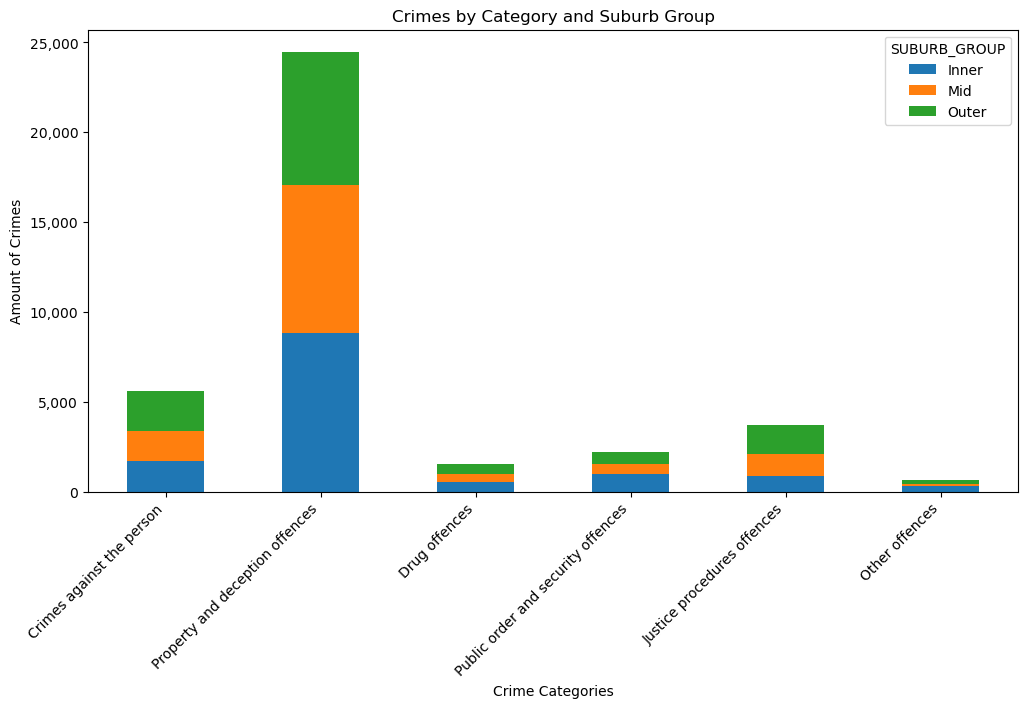

In [7]:
grouped_data.T.plot(kind="bar", stacked=True, color=colors, figsize=(12, 6))
plt.title("Crimes by Category and Suburb Group")
plt.xlabel("Crime Categories")
plt.ylabel("Amount of Crimes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="SUBURB_GROUP")

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("fig3_crime_category_by_suburb_group.png",bbox_inches="tight")
plt.show()


In [12]:
crime_df = pd.read_csv("crime_clean_final.csv")
house_df = pd.read_csv("house_by_postcode_2022.csv")

print("crime_df columns:", crime_df.columns)
print("house_df columns:", house_df.columns)

crime_df columns: Index(['POST_CODE', 'MUNICIPALITY', 'CITY_SHIRE', 'SUBURB_GROUP', 'Year',
       'Offence Division', 'Offence Subdivision', 'Offence Subgroup',
       'Incidents Recorded', 'SUBURB_NAMES'],
      dtype='object')
house_df columns: Index(['POST_CODE', 'MUNICIPALITY', 'CITY_SHIRE', 'SUBURB_GROUP',
       'SUBURB_NAMES', '2022'],
      dtype='object')
